<a href="https://colab.research.google.com/github/champsleague/Java-Weather-Record/blob/main/DS_phw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

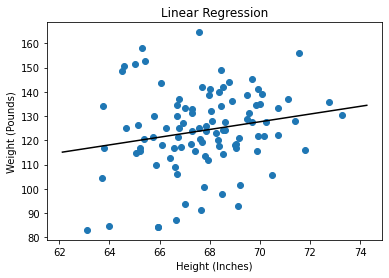

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[201.9705208  215.34175071 234.34564082 154.66568023 236.94127084
 171.94100473 199.15617756 208.71200618 201.98577987 185.2545363
 210.86099074 184.54514887 264.2756551  226.61533644 220.9423033
 197.22733676 213.49762949 238.97835561 218.56522755 215.00605135
 198.11649501 177.66664984 242.41450563 219.41003916 207.28003858
 253.16610429 151.29835494 229.56542176 244.53917107 237.25122054
 189.43249926 229.41489747 227.69110031 200.8926906  190.69900141
 257.11073076 165.47545406 205.07955468 212.12987711 230.1137943
 203.9058785  247.65090707 232.17503925 209.57207685 182.76047441
 194.50915739 195.56759587 200.0361168  225.14522119 228.322444
 219.66626424 203.90778588 150.49773103 240.68959584 210.32183722
 176.35421156 208.17619057 202.73458654 258.9912512  215.28691346
 234.36805257 223.29156305 228.27968684 236.59333244 219.40876757
 217.30238123 219.79930419 255.93196822 240.79720401 148.47193161
 209.53106812 215.22190349 225.00677699 213.76609361 213.56120892
 216.45121168 2

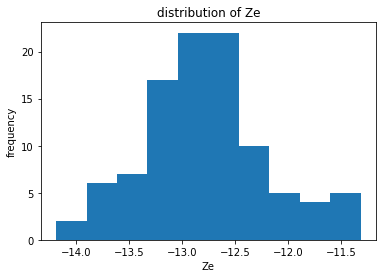

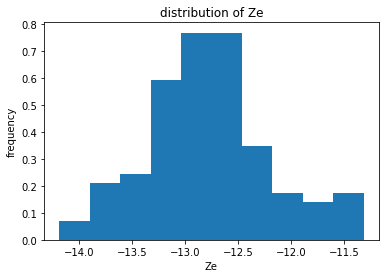

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

df=pd.read_excel('bmi.phw.xlsx')


# compute Linear Regression
height = np.array(df['Height (Inches)'])
weight = np.array(df['Weight (Pounds)'])

reg = linear_model.LinearRegression()
reg.fit(height[:, np.newaxis], weight)

px = np.array([height.min() - 1, height.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title("Linear Regression")
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')

plt.scatter(height, weight)
plt.plot(px, py, color='k')
plt.show()

#prediction w'
prediction = reg.predict(df[['Weight (Pounds)']])
print(prediction)

#compute e = w-w'
e = weight-prediction
print('e = weight - prediction \n',e,'\n')

#print mean of e
me = df['Weight (Pounds)'].mean()
print('mean of e : ',me,'\n')

#print standard deviation of e
stde = df['Weight (Pounds)'].std()
print('standard deviation of e : ',stde,'\n')

#compute ze
ze = (e-me) / stde
print('value of ze \n',ze,'\n')

#plot a histogram showing the distribution of ze (~10 bins)
plt.hist(ze, bins = 10) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

#Decide a value α (≥0); for records 
plt.hist(ze, bins = 10, alpha = 1,density=True) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000 

['Sex' 'Age' 'Height (Inches)' 'Weight (Pounds)' 'BMI'] 

Sex                 object
Age                  int64
Height (Inches)    float64
Weight (Pounds)    float64
BMI                  int64
dtype: object 



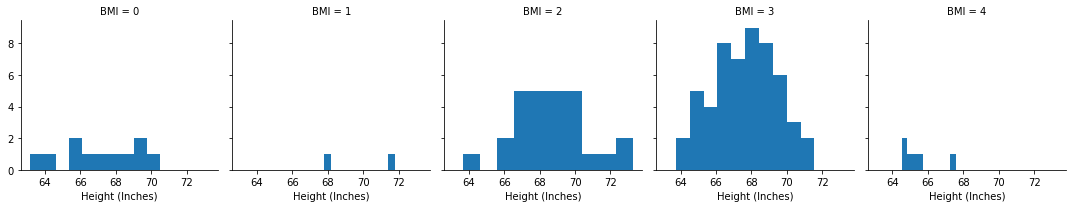

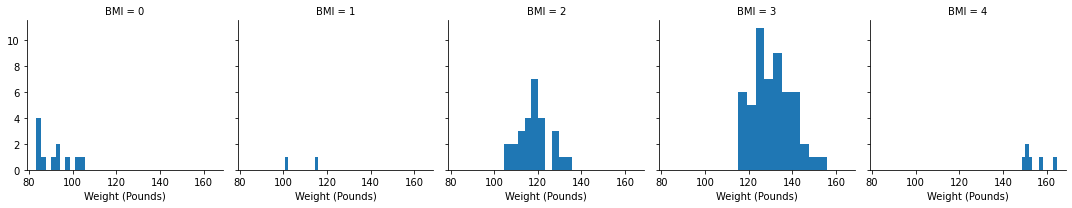

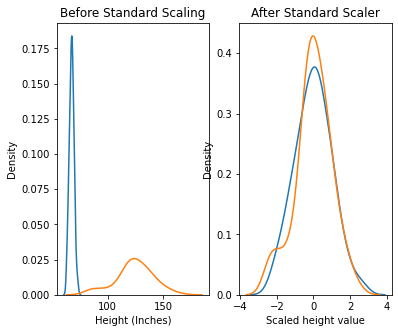

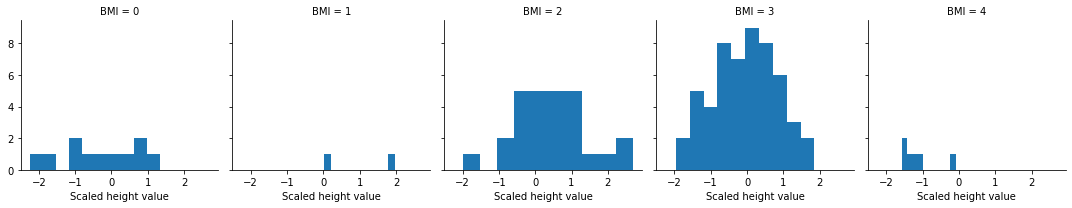

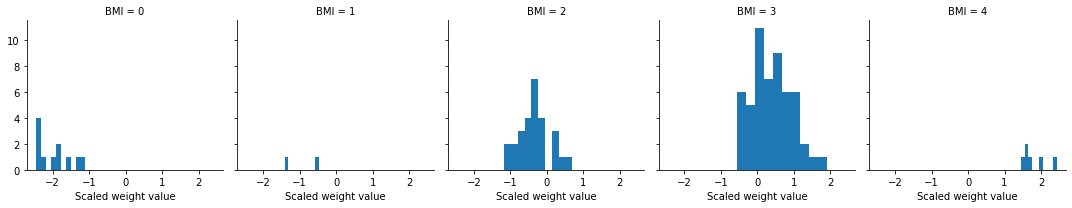

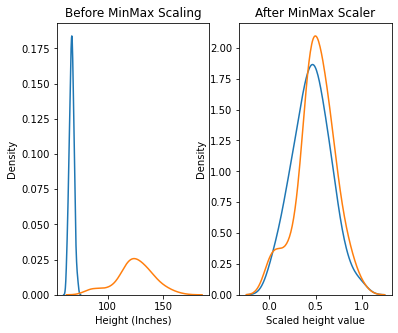

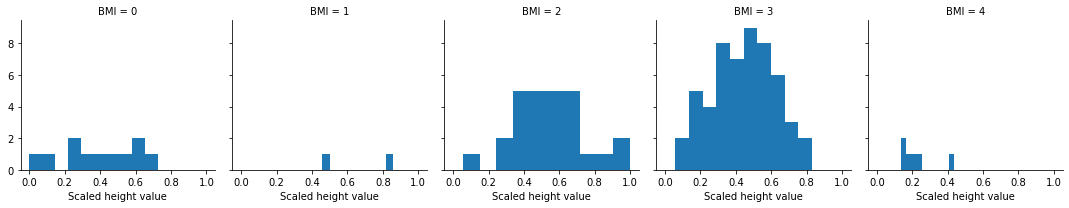

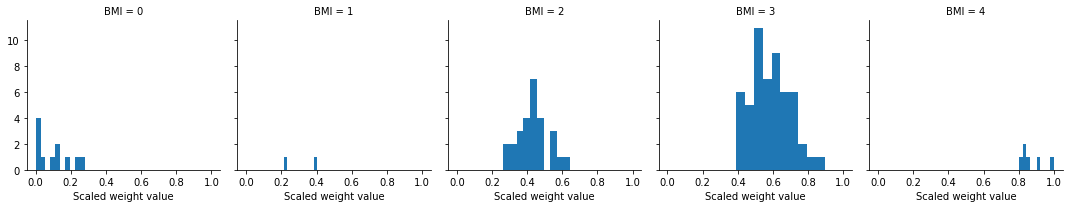

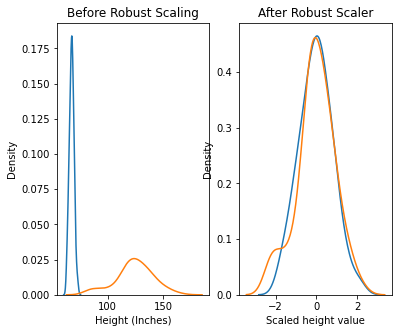

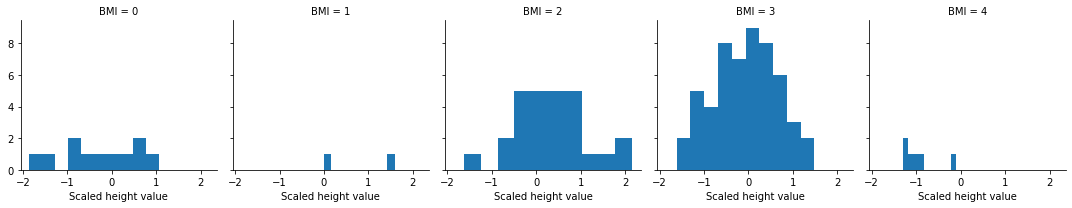

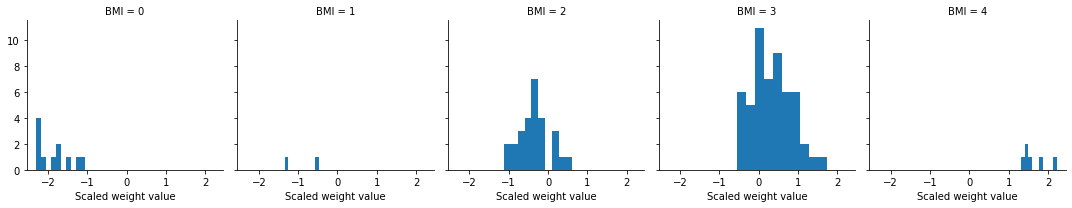

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df=pd.read_excel('bmi.phw.xlsx')
print(df.describe(),'\n')

print(df.columns.values, '\n')
print(df.dtypes,'\n')

g1 = sns.FacetGrid(df, col='BMI')
g1.map(plt.hist, 'Height (Inches)', bins=10)

g2 = sns.FacetGrid(df, col='BMI')
g2.map(plt.hist, 'Weight (Pounds)', bins=10)
plt.show()

# plot result using StandardScaler
stdScaler=preprocessing.StandardScaler()
stdScaled_df=stdScaler.fit_transform(df.iloc[:,1:4])
stdScaled_df=pd.DataFrame(stdScaled_df,columns=['Age', 'Scaled height value', 'Scaled weight value'])
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(stdScaled_df['Scaled height value'], ax=ax2)
sns.kdeplot(stdScaled_df['Scaled weight value'], ax=ax2)

#Histogram after Standard scaling
stdScaled_df=pd.concat([stdScaled_df,df.iloc[:,-1]],axis=1)
g1_afterStd = sns.FacetGrid(stdScaled_df, col='BMI')
g1_afterStd.map(plt.hist, 'Scaled height value', bins=10)
g2_afterStd = sns.FacetGrid(stdScaled_df, col='BMI')
g2_afterStd.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()

# plot result using MinMaxScaler
mmScaler = preprocessing.MinMaxScaler()
mmScaler_df = mmScaler.fit_transform(df.iloc[:,1:4])
mmScaler_df = pd.DataFrame(mmScaler_df, columns = ['Age', 'Scaled height value', 'Scaled weight value'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before MinMax Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(mmScaler_df['Scaled height value'], ax=ax2)
sns.kdeplot(mmScaler_df['Scaled weight value'], ax=ax2)

mmScaler_df=pd.concat([mmScaler_df,df.iloc[:,-1]],axis=1)
g1_afterMm = sns.FacetGrid(mmScaler_df, col='BMI')
g1_afterMm.map(plt.hist, 'Scaled height value', bins=10)
g2_afterMm = sns.FacetGrid(mmScaler_df, col='BMI')
g2_afterMm.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()

# plot result using RobustScaler
robScaler = preprocessing.RobustScaler()
robScaled_df = robScaler.fit_transform(df.iloc[:,1:4])
robScaled_df = pd.DataFrame(robScaled_df, columns = ['Age', 'Scaled height value', 'Scaled weight value'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Robust Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(robScaled_df['Scaled height value'], ax=ax2)
sns.kdeplot(robScaled_df['Scaled weight value'], ax=ax2)

#Histogram after Robust scaling
robScaled_df=pd.concat([robScaled_df,df.iloc[:,-1]],axis=1)
g1_afterRob = sns.FacetGrid(robScaled_df, col='BMI')
g1_afterRob.map(plt.hist, 'Scaled height value', bins=10)
g2_afterRob = sns.FacetGrid(robScaled_df, col='BMI')
g2_afterRob.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


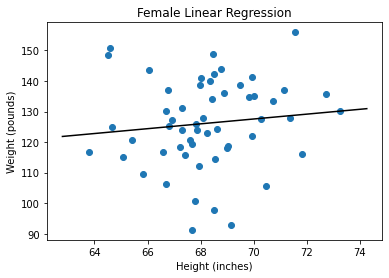

[[116.7431 125.1554 137.1114 138.7444  97.8505 114.9725 116.7527 106.2265
  105.7802 155.9414 123.9952 140.026  127.1834 124.9442 114.3184 142.1878
  148.952  143.5245 134.0093 116.065  109.6518 118.6991 123.1347 135.7458
  112.0489 133.322  127.8761 117.9619 141.1026 121.9972 100.627  120.6473
  137.1255 138.5255 127.9598 150.6921 141.1703 131.236  124.0352 125.8534
  130.2636 136.1884 127.4072  91.2607 143.8737 135.002  134.7905 120.5746
  115.6622  92.7496 118.4945 130.0975 119.5261 124.4062 148.5007]]
[164.58049088 171.24415179 180.71489461 141.00573977 182.0084479
 149.6150379  163.17794009 167.94016481 164.58809536 156.24994438
 169.0111287  155.8964154  195.63076007 176.86243471 174.03523262
 162.21668663 170.32511902 183.02364562 172.85059763 171.07685329
 162.65980586 152.46845959 184.73607886 173.27161635 167.22653214
 190.09422528 139.32760589 178.33263366 185.79492312 182.16291384
 158.33206612 178.25761866 177.39855036 164.04334545 158.96323774
 192.06006189 146.39287826 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

df=pd.read_excel('bmi.phw.xlsx')

# Female datasets
female = df[df['Sex'] == 'Female']
fx = female['Height (Inches)']
fy = female['Weight (Pounds)']

# Make Linear Regression
height = np.array([fx])
weight = np.array([fy])

reg = linear_model.LinearRegression()
reg.fit(fx[:, np.newaxis], fy)

px = np.array([fx.min() - 1, fx.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title("Female Linear Regression")
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.scatter(height, weight)
plt.plot(px, py, color='k')
plt.show()

#value of w
w = np.array([fy])
print(w)

#prediction w'
prediction = reg.predict(df[['Weight (Pounds)']])
print(prediction)


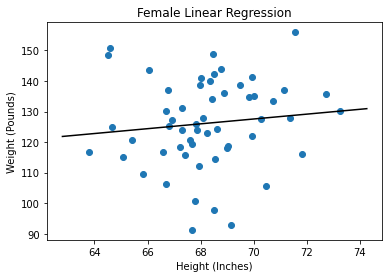

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[164.58049088 171.24415179 180.71489461 182.0084479  149.6150379
 163.17794009 164.58809536 156.24994438 155.8964154  195.63076007
 170.32511902 183.02364562 172.85059763 171.07685329 162.65980586
 184.73607886 190.09422528 185.79492312 178.25761866 164.04334545
 158.96323774 166.12990314 169.64348852 179.63315771 160.86205989
 177.71318561 173.3993082  165.54594265 183.87645607 168.74243717
 151.81439533 167.67313676 180.72606369 181.83504997 173.46560973
 191.47261601 183.93008348 176.06079605 170.35680434 171.79706066
 175.29052587 179.9837558  173.02787701 144.39503948 186.07153598
 179.04396914 178.876433   167.61554869 163.72427426 145.57444639
 165.96783272 175.15895257 166.78499718 170.6506857  189.73673563]
e = weight - prediction 
 [-47.83739088 -46.08875179 -43.60349461 -43.2640479  -51.7645379
 -48.20544009 -47.83539536 -50.02344438 -50.1162154  -39.68936007
 -46.32991902 -42.99764562 -45.66719763 -46.13265329 -48.34140586
 -42.54827886 -41.14222528 -42.27042312 -44.2483186

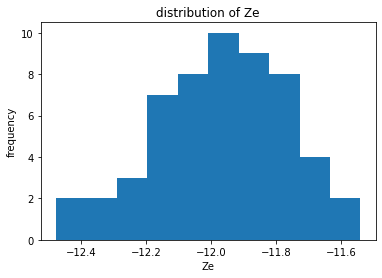

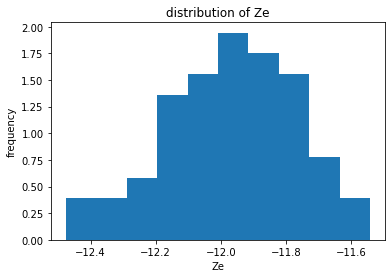

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

df=pd.read_excel('bmi.phw.xlsx')
df2 = df.where(df['Sex'] == 'Female')
df3 = df2.dropna(axis=0, how='any')


# compute Female Linear Regression
height = np.array(df3['Height (Inches)'])
weight = np.array(df3['Weight (Pounds)'])

reg = linear_model.LinearRegression()
reg.fit(height[:, np.newaxis], weight)

px = np.array([height.min() - 1, height.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title("Female Linear Regression")
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')

plt.scatter(height, weight)
plt.plot(px, py, color='k')
plt.show()

#prediction w'
prediction = reg.predict(df3[['Weight (Pounds)']])
print(prediction)

#compute e = w-w'
e = weight-prediction
print('e = weight - prediction \n',e,'\n')

#print mean of e
me = df3['Weight (Pounds)'].mean()
print('mean of e : ',me,'\n')

#print standard deviation of e
stde = df3['Weight (Pounds)'].std()
print('standard deviation of e : ',stde,'\n')

#compute ze
ze = (e-me) / stde
print('value of ze \n',ze,'\n')

#plot a histogram showing the distribution of ze (~10 bins)
plt.hist(ze, bins = 10) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

#Decide a value α (≥0); for records 
plt.hist(ze, bins = 10, alpha = 1,density=True) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

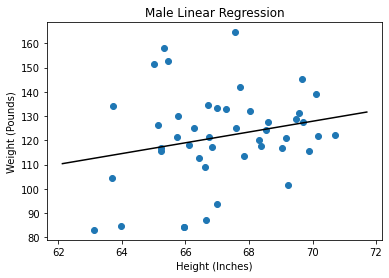

[165.5970893  241.09052919 244.09229174 266.09840833 258.17415486
 225.04841744 197.72549555 256.03384488 239.09031627 160.89351389
 270.21917112 280.95491269 214.1603675  267.6010658  308.69523943
 180.69648775 270.98515342 234.37719384 295.48148959 242.29190028
 204.84069409 222.73004433 228.97180102 264.04490968 159.77517972
 232.74110003 311.32200368 250.27454603 261.45566746 268.42322014
 256.03206869 253.08980854 156.94548567 242.23461813 250.18373827
 248.15022177 337.89759328 232.28128863 232.23643981 287.51172123
 243.33585646 229.30283859 233.39651446 323.11679905 159.77517972]
e = weight - prediction 
 [ -78.6150893  -120.10612919 -121.75589174 -133.85040833 -129.49525486
 -111.28941744  -96.27279555 -128.31894488 -119.00681627  -76.03001389
 -136.11517112 -142.01551269 -105.3053675  -134.6762658  -157.26153943
  -86.91368775 -136.53615342 -116.41649384 -149.99928959 -120.76640028
 -100.18329409 -110.01524433 -113.44570102 -132.72180968  -75.41537972
 -115.51730003 -158.7052

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


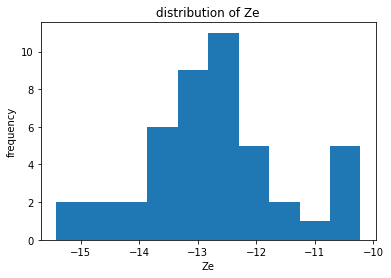

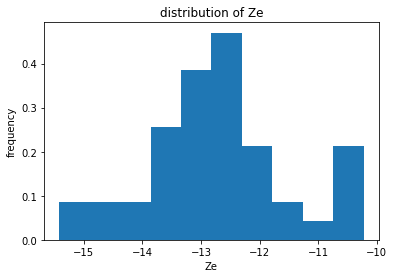

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

df=pd.read_excel('bmi.phw.xlsx')
df2 = df.where(df['Sex'] == 'Male')
df3 = df2.dropna(axis=0, how='any')


# compute Male Linear Regression
height = np.array(df3['Height (Inches)'])
weight = np.array(df3['Weight (Pounds)'])

reg = linear_model.LinearRegression()
reg.fit(height[:, np.newaxis], weight)

px = np.array([height.min() - 1, height.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title("Male Linear Regression")
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')

plt.scatter(height, weight)
plt.plot(px, py, color='k')
plt.show()

#prediction w'
prediction = reg.predict(df3[['Weight (Pounds)']])
print(prediction)

#compute e = w-w'
e = weight-prediction
print('e = weight - prediction \n',e,'\n')

#print mean of e
me = df3['Weight (Pounds)'].mean()
print('mean of e : ',me,'\n')

#print standard deviation of e
stde = df3['Weight (Pounds)'].std()
print('standard deviation of e : ',stde,'\n')

#compute ze
ze = (e-me) / stde
print('value of ze \n',ze,'\n')

#plot a histogram showing the distribution of ze (~10 bins)
plt.hist(ze, bins = 10) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

#Decide a value α (≥0); for records 
plt.hist(ze, bins = 10, alpha = 1,density=True) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

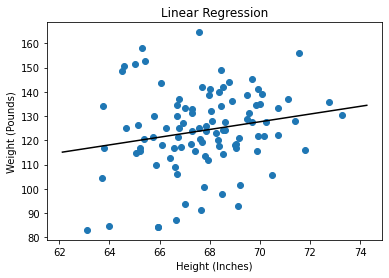

e = weight-prediction 
 [ -85.2274208   -90.18635071  -97.23424082  -67.68368023  -98.19687084
  -74.09050473  -84.18367756  -87.72760618  -85.23307987  -79.0280363
  -88.52459074  -78.76494887 -108.3342551   -94.36733644  -92.2634033
  -83.46833676  -89.50242949  -98.95235561  -91.38182755  -90.06185135
  -83.79809501  -76.21394984 -100.22670563  -91.69513916  -87.19653858
 -104.21410429  -66.43485494  -95.46142176 -101.01467107  -98.31182054
  -80.57749926  -95.40559747  -94.76630031  -84.8276906   -81.04720141
 -105.67703076  -71.69265406  -86.38045468  -88.99517711  -95.6647943
  -85.9451785  -102.16870707  -96.42923925  -88.04657685  -78.10307441
  -82.46025739  -82.85279587  -84.5100168   -93.82212119  -95.000444
  -91.79016424  -85.94588588  -66.13793103  -99.58699584  -88.32463722
  -75.72721156  -87.52889057  -85.51078654 -106.3744512   -90.16601346
  -97.24255257  -93.13466305  -94.98458684  -98.06783244  -91.69466757
  -90.91348123  -91.83950419 -105.23986822  -99.62690401  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


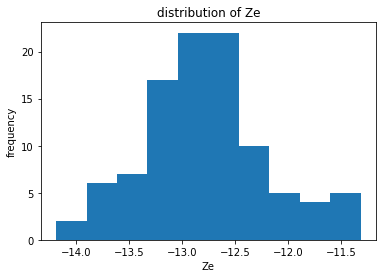

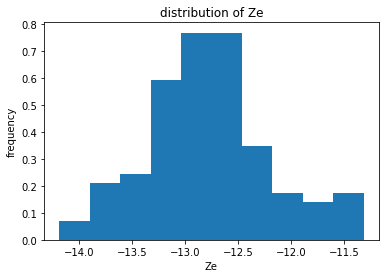

In [ ]:


#prediction w'
prediction = reg.predict(df[['Weight (Pounds)']])

#compute e = w-w'
e = weight-prediction
print('e = weight-prediction \n',e,'\n')

#print mean of e
me = df['Weight (Pounds)'].mean()
print('mean of e : ',me,'\n')

#print standard deviation of e
stde = df['Weight (Pounds)'].std()
print('std of e : ',stde,'\n')

#compute ze
ze = (e-me) / stde
print('value of ze \n ',ze,'\n')

#plot a histogram showing the distribution of ze (~10 bins)
plt.hist(ze, bins = 10) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

#Decide a value α (≥0); for records 
plt.hist(ze, bins = 10, alpha = 1,density=True) 
plt.title("distribution of Ze") 
plt.xlabel('Ze')
plt.ylabel('frequency')
plt.show()

In [ ]:
df=pd.read_excel('bmi.phw.xlsx')
print(df)

       Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0   Female   30          63.7902         116.7431    3
1   Female   32          66.7917         125.1554    3
2   Female   27          71.1411         137.1114    3
3     Male   24          66.6432          86.9820    0
4   Female   19          69.4712         138.7444    3
..     ...  ...              ...              ...  ...
95  Female   23          66.7140         130.0975    3
96  Female   30          67.6748         119.5261    2
97    Male   29          65.9390          84.3598    0
98  Female   34          68.6276         124.4062    3
99  Female   22          64.5158         148.5007    4

[100 rows x 5 columns]


In [ ]:
from google.colab import files
myfile = files.upload()

Saving bmi.phw.xlsx to bmi.phw.xlsx
